In [1]:
import os
import polars as pl

dataframes = []

for base_dir, sub_dirs, files in os.walk("../data/raw/food101/data"):
    for filename in files:
        if "train" in filename and filename.endswith(".parquet"):
            print(f"Reading: {os.path.join(base_dir, filename)}")
            dataframes.append(pl.read_parquet(os.path.join(base_dir, filename)))

train_data = pl.concat(dataframes)
train_data = train_data.sample(fraction=1.0, shuffle=True, seed=42) # Shuffle the dataset

display(train_data.head())

Reading: ../data/raw/food101/data/train-00002-of-00008.parquet
Reading: ../data/raw/food101/data/train-00006-of-00008.parquet
Reading: ../data/raw/food101/data/train-00003-of-00008.parquet
Reading: ../data/raw/food101/data/train-00007-of-00008.parquet
Reading: ../data/raw/food101/data/train-00000-of-00008.parquet
Reading: ../data/raw/food101/data/train-00004-of-00008.parquet
Reading: ../data/raw/food101/data/train-00001-of-00008.parquet
Reading: ../data/raw/food101/data/train-00005-of-00008.parquet


image,label
struct[2],i64
"{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x03\x12Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0a\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00\x86\x01\x10\x00\x02\x00\x00\x00\x09""…,""2632284.jpg""}",44
"{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x90\x00\x90\x00\x00\xff\xe1\x02\xc2Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01""…,""3560567.jpg""}",48
"{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xb4\x00\xb4\x00\x00\xff\xed\x1f\xaaPhotoshop\x203.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x11\x1c\x02\x00\x00\x02\x00\x02\x1c\x02P""…,""1702116.jpg""}",30
"{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xb4\x00\xb4\x00\x00\xff\xed0|Photoshop\x203.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x07\x1c\x02\x00\x00\x02\x00\x00\x008B""…,""169107.jpg""}",29
"{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x01\x1aExif\x00\x00II*\x00\x08\x00\x00\x00\x0d\x002\x01\x02\x00\x14\x00\x00\x00\xaa\x00\x00\x00\x10\x01\x02\x00\x12\x00\x00\x00""…,""1557266.jpg""}",33


In [2]:
from IPython.display import Image, display
from src.labels import LABELS

def display_row(row):
    img_bytes = row[0]["bytes"]
    print(type(img_bytes))
    display(Image(data=img_bytes))
    label =  LABELS[row[1]]
    print(label)

<class 'bytes'>


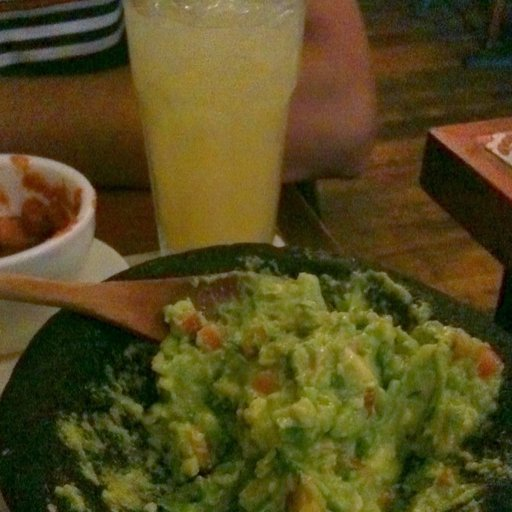

guacamole


In [3]:
display_row(train_data.row(1000))